Name: Ashwini Giri.   USC ID: 5413882039

# 1. MNIST Database

One of the most famous applications of machine learning is classification of handwritten digits. A well known benchmark database that is extensively used in the literature is the MNIST, which contains a large number of handwritten digits, centered and normalized into fixed-size images (28 × 28 pixels).

(a) Download the MNIST data from: http://yann.lecun.com/exdb/mnist/ or https: //archive.ics.uci.edu/ml/databases/mnist/. You will see the following
• database_train_images- A 60000 × 784 matrix. Each row is an image, of size 28 × 28, unrolled into a vector.
• database_train_labels - A 60000 × 1 vector. Each row is the digit that corresponds to database_train_images.
• database_test_images - A 10000 × 784 matrix with test images.
• database_test_labels - A 10000 × 1 vector with corresponding digits.

MNIST data is downloaded from the website and store in local directory

(b) Visualization of data from MNIST database
Many machine learning problems come from real-life applications. If possible, it is important to visualize the data, in order to gain intuition, and learn what methods we want to apply. In our case, the data observations are 28 × 28 gray-scale images of digits.

i. Plot the first 25 images in the training set. Do all images of 9 look alike?

ii. Plot 15 randomly selected images from the test set without looking at the corresponding labels and try to guess them. Were all of your guesses correct?

In [ ]:
All necessary package imports

In [164]:
import struct
import numpy as np
from sklearn import neighbors, metrics
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def read_idx(filename):
    with open(filename,'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB',f.read(4))
        shape = tuple(struct.unpack('>I',f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype = np.uint8).reshape(shape)

In [188]:
raw_train = read_idx("train-images-idx3-ubyte")
train_data = np.reshape(raw_train,(60000,28*28))
train_label = read_idx("train-labels-idx1-ubyte")

raw_test = read_idx("t10k-images-idx3-ubyte")
test_data = np.reshape(raw_test,(10000,28*28))
test_label = read_idx("t10k-labels-idx1-ubyte")

First 25 images from training set:



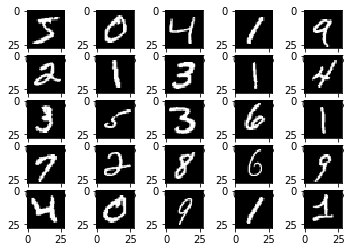

15 Random images from test set:



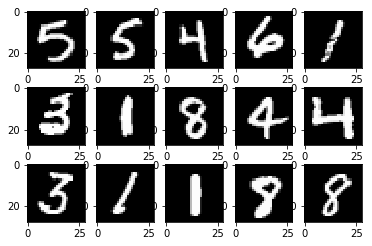

In [257]:
print("First 25 images from training set:\n")
idx_train=0
for i in range(5):
    for j in range(5):
        plt.subplot2grid(shape=(5,5),loc=(i,j))
        x = train_data[idx_train].reshape((28,28))
        plt.imshow(x, cmap = 'gray')
        idx_train+=1

plt.show()
        
print("15 Random images from test set:\n")
for i in range(3):
    for j in range(5):
        rand_value = random.randint(0,10000)
        plt.subplot2grid(shape=(3,5),loc=(i,j))
        x = test_data[rand_value].reshape((28,28))
        plt.imshow(x, cmap = 'gray')
        

plt.show()


After plotting the first 25 images and observing them all images of 9 does not look alike.

After plotting the 15 random images from the test set and observing them the number was guessed correct.
All the guesses were correct when compared to the labels.

iii. Let us explore the data even more. Find 2 different digits that look alike. Find 3 samples of the same digit that do not look alike at all.


50 Random images from train set:



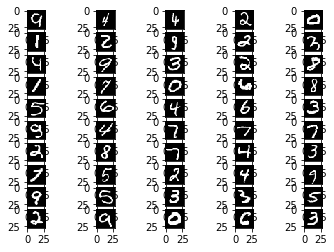

In [176]:
print("50 Random images from train set:\n")
for i in range(10):
    for j in range(5):
        rand_value = random.randint(0,60000)
        plt.subplot2grid(shape=(10,5),loc=(i,j))
        x = train_data[rand_value].reshape((28,28))
        plt.imshow(x, cmap = 'gray')
        

plt.show()

The 2 different digits '1' and '7' from image number 16 and 17 look alike. 
These are 2 different digits but when observed they look alike.
The digit '6' looks different in image numer 19, 22, 24 instead of being the same digits.

(c) Classification using KNN on MNIST database

i. What is the nearest neighbor of a train sample, assuming it is included in the training set?

Answer: The nearest neighbor of a train sample, assuming it is included in the training set is itself.

ii. Write code for k-nearest neighbors with Euclidean metric (or use a software package). Find 5 nearest neighbors for the first 10 test samples and plot them together.

In [282]:
idx = range(0, 20000)
X=train_data[idx]
Y=train_label[idx]
knn=neighbors.KNeighborsClassifier(n_neighbors=5, metric = 'euclidean', algorithm='ball_tree')
knn.fit(X,Y)


KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

[[16186 14563 15260 14770 17228]
 [16902 17757  1609 12844 11364]
 [15224 12578 16651 16362 11835]
 [ 1877  2327 11791  4356  6357]
 [ 1732   914 15514  7864 19596]
 [ 3468  9815  9312 14154 14980]
 [18279 18717 11145    54 19478]
 [14815 11688  3186  4544  4158]
 [17001 14233 14074 17083  2885]
 [ 5044 17167 13359  3970  9469]]
Predicted value:  7
Predicted value:  2
Predicted value:  1
Predicted value:  0
Predicted value:  4
Predicted value:  1
Predicted value:  4
Predicted value:  9
Predicted value:  5
Predicted value:  9


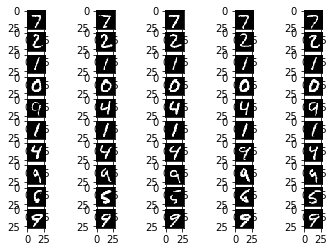

In [283]:
idx = range(0,10)
x=test_data[idx]
# print(x[0])
# neigh = neighbors.NearestNeighbors(n_neighbors=5, metric = 'euclidean', algorithm='ball_tree')
# neigh.fit(x)
#NearestNeighbors(algorithm = 'ball_tree')
neigh = knn.kneighbors(x)
p=knn.predict(x)
print(neigh[1])
# print(((neigh[1])[0])[0])
row = 0
for i in idx:
    for j in range(5):
        plt.subplot2grid(shape=(10,5),loc=(row,j))
        img = ((neigh[1])[i])[j]
        y = train_data[img].reshape((28,28))
        plt.imshow(y, cmap = 'gray')
    print("Predicted value: ",p[i])
    row+=1
    
    
plt.show()

In [177]:
from sklearn.metrics import accuracy_score
import time

iii. Test all 10000 digits in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of 1/k for k ∈ {1,201,401,...,10001}. You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values?

In [194]:
idx = range(0, 30000)
X=train_data[idx]
Y=train_label[idx]
knn=neighbors.KNeighborsClassifier(n_neighbors=1, metric = 'euclidean', algorithm='ball_tree')
knn.fit(X,Y)
t1 = time.time()*1000
pred = knn.predict(X)
t1 = time.time()*1000 - t1
print("Time taken: ",t1,"ms")

Time taken:  1008773.66015625 ms


Time taken for predicting train_data in iteration  1 :  2050096.451171875 ms
Time taken for predicting test_data in iteration  1 :  74088.7607421875 ms
Time taken for predicting train_data in iteration  2 :  218234.89819335938 ms
Time taken for predicting test_data in iteration  2 :  72837.38305664062 ms
Time taken for predicting train_data in iteration  3 :  214818.08984375 ms
Time taken for predicting test_data in iteration  3 :  71717.69213867188 ms
Time taken for predicting train_data in iteration  4 :  196344.43579101562 ms
Time taken for predicting test_data in iteration  4 :  78250.80908203125 ms
Time taken for predicting train_data in iteration  5 :  218088.09594726562 ms
Time taken for predicting test_data in iteration  5 :  113687.10205078125 ms
Time taken for predicting train_data in iteration  6 :  224165.09887695312 ms
Time taken for predicting test_data in iteration  6 :  73179.53369140625 ms
Time taken for predicting train_data in iteration  7 :  252306.46606445312 ms
Ti

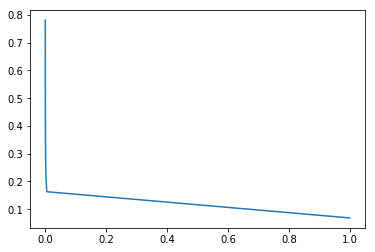

[1 1 1 ..., 1 1 0]


In [243]:
idx = range(0, 15000)
X=train_data[idx]
Y=train_label[idx]
id_test = range(0, 5000)
x=test_data[id_test]
y=test_label[id_test]
error_rate = []
train_error = []
v=1
k=[]
k_reverse = []
for i in range(1,52):
    k.append(v)
    v+=200
for i in k:
    k_reverse.append(1/i)
i=1
for k in k:
    knn=neighbors.KNeighborsClassifier(n_neighbors=k, metric = 'euclidean', algorithm='ball_tree')
    knn.fit(X,Y)
    
    t2 = time.time()*1000
    pred_test = knn.predict(X)
    t2 = time.time()*1000-t2
    print("Time taken for predicting train_data in iteration ",i,": ",t2,"ms")
    accuracy_train = accuracy_score(Y,pred_test)
    error_tr = 1-accuracy_train
    train_error.append(error_tr)
    
    t1 = time.time()*1000
    pred = knn.predict(x)
    t1 = time.time()*1000 - t1
    print("Time taken for predicting test_data in iteration ",i,": ",t1,"ms")
    accuracy = accuracy_score(y,pred)
    error = 1-accuracy
    error_rate.append(error)
    i+=1




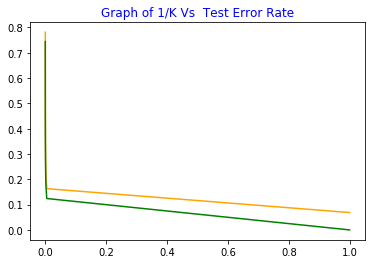

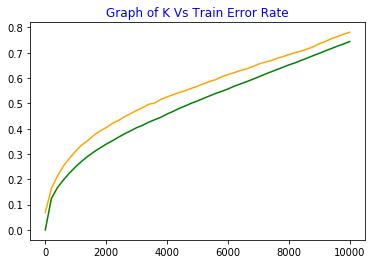

In [284]:
fig = plt.figure()
graph1 = fig.add_subplot()
plt.plot(k_reverse,error_rate, color = 'orange')
plt.plot(k_reverse,train_error, color = 'green')
plt.title("Graph of 1/K Vs  Test Error Rate", color = 'blue')
plt.show()

k_val = []
val = 1

for i in range(51):
    k_val.append(val)
    val+=200
# print(k_val)

plt.plot(k_val,train_error, color = 'green')
plt.plot(k_val,error_rate, color = 'orange')
plt.title("Graph of K Vs Train Error Rate", color = 'blue')
plt.show()

In [422]:
print("Train Error: line graph in GREEN color")
print("Test Error: line graph in ORANGE color")

Train Error: line graph in GREEN color
Test Error: line graph in ORANGE color


In [333]:
# code for checking error rates for k values between (1,10) with increments of 1
idx = range(0, 15000)
X=train_data[idx]
Y=train_label[idx]
id_test = range(0, 5000)
x=test_data[id_test]
y=test_label[id_test]
error_rate = []
train_error = []
k=[]
k_reverse = []
for i in range(1,11):
    k.append(i)
    
for i in k:
    k_reverse.append(1/i)
i=1
for k in k:
    knn=neighbors.KNeighborsClassifier(n_neighbors=k, metric = 'euclidean', algorithm='ball_tree')
    knn.fit(X,Y)
    
    t1 = time.time()*1000
    pred = knn.predict(x)
    t1 = time.time()*1000 - t1
    print("Time taken for predicting test_data in iteration ",i,": ",t1,"ms")
    accuracy = accuracy_score(y,pred)
    error = 1-accuracy
    error_rate.append(error)
    i+=1




Time taken for predicting test_data in iteration  1 :  74043.84619140625 ms
Time taken for predicting test_data in iteration  2 :  74166.26489257812 ms
Time taken for predicting test_data in iteration  3 :  74861.11279296875 ms
Time taken for predicting test_data in iteration  4 :  73708.60278320312 ms
Time taken for predicting test_data in iteration  5 :  73490.10522460938 ms
Time taken for predicting test_data in iteration  6 :  72779.69970703125 ms
Time taken for predicting test_data in iteration  7 :  75838.05981445312 ms
Time taken for predicting test_data in iteration  8 :  76226.23291015625 ms
Time taken for predicting test_data in iteration  9 :  74885.5390625 ms
Time taken for predicting test_data in iteration  10 :  74820.87182617188 ms


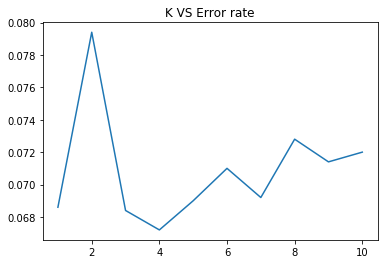

6.72


In [344]:
k=[]
for i in range(1,11):
    k.append(i)
plt.plot(k, error_rate)
plt.title("K VS Error rate")
plt.show()
print(error_rate[3]*100)

As seen in the graph the best value for k is k=4 since the error rate is lowest i.e. 6.72%

iv. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {5000,10000,15000,...,55000,60000}. (You are welcome to choose smaller increments of N).

In [298]:
N = [5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,60000]
train_error1 = []
id_test = range(0, 5000)
x=test_data[id_test]
y=test_label[id_test]
for i in N:
    idx = range(0, i)
    X=train_data[idx]
    Y=train_label[idx]
    knn=neighbors.KNeighborsClassifier(n_neighbors=4, metric = 'euclidean', algorithm='ball_tree')
    knn.fit(X,Y)
    
    t2 = time.time()*1000
    pred_test = knn.predict(x)
    t2 = time.time()*1000-t2
    print("Time taken for predicting train_data in iteration ",i,": ",t2,"ms")
    accuracy_train = accuracy_score(y,pred_test)
    error_tr = 1-accuracy_train
    train_error1.append(error_tr)
    #print(accuracy_train)
    


Time taken for predicting train_data in iteration  5000 :  27440.390625 ms
Time taken for predicting train_data in iteration  10000 :  49366.135986328125 ms
Time taken for predicting train_data in iteration  15000 :  73877.71313476562 ms
Time taken for predicting train_data in iteration  20000 :  98730.505859375 ms
Time taken for predicting train_data in iteration  25000 :  122975.8310546875 ms
Time taken for predicting train_data in iteration  30000 :  146466.37353515625 ms
Time taken for predicting train_data in iteration  35000 :  172980.26171875 ms
Time taken for predicting train_data in iteration  40000 :  197678.2529296875 ms
Time taken for predicting train_data in iteration  45000 :  218050.6650390625 ms
Time taken for predicting train_data in iteration  50000 :  242360.19482421875 ms
Time taken for predicting train_data in iteration  55000 :  1776330.4970703125 ms
Time taken for predicting train_data in iteration  60000 :  295204.3310546875 ms


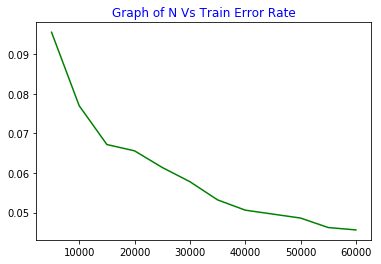

In [325]:
plt.plot(N,train_error1, color = 'green')
plt.title("Graph of N Vs Train Error Rate", color = 'blue')
plt.show()

(d) Plot the k nearest neighbors of some of misclassified samples.

In [382]:
idx = range(0,100)
x=train_data[idx]
y=train_label[idx]

knn=neighbors.KNeighborsClassifier(n_neighbors=5, metric = 'euclidean', algorithm='ball_tree')
knn.fit(x,y)
p=knn.predict(x)

In [383]:
neighbours = knn.kneighbors(x,n_neighbors=5,return_distance=False)
misclassified_ind = []
for i in idx:
    if y[i] != p[i]:
        misclassified_ind.append(i)
    else:
        continue

In [387]:
mis_nei = []
for i in range(len(neighbours)):
    for j in misclassified_ind:
        if i == j:
            mis_nei.append(neighbours[i])
        else:
            continue


Misclassified Samples



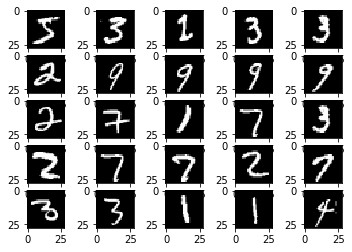

Predicted Values:  [3 0 4 1 9]


In [386]:
print("Misclassified Samples\n")
row = 0
for i in range(0,5):
    
    for j in range(0,5):
        plt.subplot2grid(shape=(5,5),loc=(row,j))
        img = (mis_nei[row])[j]
        y = train_data[img].reshape((28,28))
        plt.imshow(y, cmap = 'gray')
    row+=1

plt.show()
print("Predicted Values: ",p[0:5])

plotted 5 neighbors of the misclassified samples. As seen the predicted value for the first 5 neighbors was 3 

As seen the predicted value for the next 5 neighbors was 0 but by majority pooling the prediction should be 9, hence it is misclassified

As seen the predicted value for the next 5 neighbors was 4, but there cannot be any majority pooling hence the image is misclassified

As seen the predicted value for the next 5 neighbors was 1 but by majority pooling the prediction should be 7, hence it is misclassified

As seen the predicted value for the next 5 neighbors was 9 but there cannot be any majority pooling hence the image is misclassified

(e) Replace the Euclidean metric with the following metrics and test them. Summa-
rize the test errors (i.e., when k = k∗) in a table.

i. Minkowski Distance:

In [393]:
#Replacing Euclidean to Minkowski
idx = range(0, 15000)
X=train_data[idx]
Y=train_label[idx]
id_test = range(0, 5000)
x=test_data[id_test]
y=test_label[id_test]
error_rate = []
distance_errorrate = {}

knn=neighbors.KNeighborsClassifier(n_neighbors=4, metric = 'minkowski', algorithm='ball_tree')
knn.fit(X,Y)
    
t1 = time.time()*1000
pred = knn.predict(x)
t1 = time.time()*1000 - t1
print("Time taken for predicting test_data: ",t1,"ms")
accuracy = accuracy_score(y,pred)
error = 1-accuracy
error_rate.append(error)
   

distance_errorrate['minkowski'] = error_rate

Time taken for predicting test_data:  75762.84375 ms


In [394]:
distance_errorrate['minkowski'] = error_rate[0]*100
distance_errorrate['euclidean'] = 6.72
print(distance_errorrate)

{'minkowski': 6.7200000000000042, 'euclidean': 6.72}


A. which becomes Manhattan Distance with p = 1

In [355]:
#Replacing Euclidean to Minkowski whic gives Manhattan Distance with p = 1
idx = range(0, 15000)
X=train_data[idx]
Y=train_label[idx]
id_test = range(0, 5000)
x=test_data[id_test]
y=test_label[id_test]

knn=neighbors.KNeighborsClassifier(n_neighbors=4, metric = 'manhattan', algorithm='ball_tree')
knn.fit(X,Y)
    
t1 = time.time()*1000
pred = knn.predict(x)
t1 = time.time()*1000 - t1
print("Time taken for predicting test_data: ",t1,"ms")
accuracy = accuracy_score(y,pred)
error = 1-accuracy

distance_errorrate['manhattan'] = error

Time taken for predicting test_data:  77163.80102539062 ms


In [357]:
distance_errorrate['manhattan'] = error*100
print(distance_errorrate)

{'minkowski': 6.3599999999999994, 'euclidean': 6.72, 'manhattan': 8.3999999999999968}


B. with log10(p) ∈ {0.1,.2,.3,...,1}

In [374]:
p_val = []
r=0.1
for i in range(10):
    a=np.power(10,r)
    a = round(a,2)
    p_val.append(a)
    r+=0.1
idx = range(0, 15000)
X=train_data[idx]
Y=train_label[idx]
id_test = range(0, 5000)
x=test_data[id_test]
y=test_label[id_test]
error_rate = []
for q in p_val:
    knn=neighbors.KNeighborsClassifier(n_neighbors=4, metric = 'minkowski', algorithm='ball_tree', p=q)
    knn.fit(X,Y)
    t1 = time.time()*1000
    pred = knn.predict(x)
    t1 = time.time()*1000 - t1
    print("Time taken for predicting test_data: ",t1,"ms")
    accuracy = accuracy_score(y,pred)
    error = 1-accuracy
    error_rate.append(error*100)
distance_errorrate['minkowski_plog'] = error_rate

Time taken for predicting test_data:  2628170.0888671875 ms
Time taken for predicting test_data:  887057.16796875 ms
Time taken for predicting test_data:  73046.63012695312 ms
Time taken for predicting test_data:  912741.9519042969 ms
Time taken for predicting test_data:  915477.4802246094 ms
Time taken for predicting test_data:  915428.1337890625 ms
Time taken for predicting test_data:  917089.5322265625 ms
Time taken for predicting test_data:  918836.4301757812 ms
Time taken for predicting test_data:  917383.3588867188 ms
Time taken for predicting test_data:  914560.2250976562 ms


In [376]:
print(distance_errorrate['minkowski_plog'])

[7.6200000000000045, 7.1200000000000045, 6.7200000000000042, 6.5799999999999965, 6.3400000000000016, 6.0799999999999965, 5.6799999999999962, 5.5400000000000009, 5.5000000000000053, 5.5400000000000009]


C. which becomes Chebyshev Distance with p → ∞

In [358]:
#Replacing Euclidean to Minkowski whic gives Chebyshev Distance with p = 1
idx = range(0, 15000)
X=train_data[idx]
Y=train_label[idx]
id_test = range(0, 5000)
x=test_data[id_test]
y=test_label[id_test]

knn=neighbors.KNeighborsClassifier(n_neighbors=4, metric = 'chebyshev', algorithm='ball_tree')
knn.fit(X,Y)
    
t1 = time.time()*1000
pred = knn.predict(x)
t1 = time.time()*1000 - t1
print("Time taken for predicting test_data: ",t1,"ms")
accuracy = accuracy_score(y,pred)
error = 1-accuracy
distance_errorrate['chebyshev'] = error*100

Time taken for predicting test_data:  76963.30810546875 ms


In [359]:
print(distance_errorrate)

{'minkowski': 6.3599999999999994, 'euclidean': 6.72, 'manhattan': 8.3999999999999968, 'chebyshev': 30.059999999999999}


ii. Mahalanobis Distance

In [399]:
#Replacing Euclidean to Mahalanobis
idx = range(0, 1000)
X=train_data[idx]
Y=train_label[idx]
id_test = range(0, 500)
x=test_data[id_test]
y=test_label[id_test]

VI_val = np.linalg.pinv(X)

knn=neighbors.KNeighborsClassifier(n_neighbors=4, metric = 'mahalanobis', algorithm='ball_tree', metric_params={'VI':np.cov(VI_val)})
knn.fit(X,Y)
    
t1 = time.time()*1000
pred = knn.predict(x)
t1 = time.time()*1000 - t1
print("Time taken for predicting test_data: ",t1,"ms")
accuracy = accuracy_score(y,pred)
error = 1-accuracy
distance_errorrate['mahalanobis'] = error

Time taken for predicting test_data:  369747.76708984375 ms


In [400]:
print(distance_errorrate)

{'minkowski': 6.7200000000000042, 'euclidean': 6.72, 'mahalanobis': 0.77800000000000002}


In [ ]:
print()

In [418]:
import pandas as pd
table = [['Euclidean',6.72],['Minkowski',6.36],['Manhattan',8.4],['Minkowski - log p = 0.1',7.62],['Minkowski - log p = 0.2',7.12],['Minkowski - log p = 0.3',6.72],['Minkowski - log p = 0.4',6.58],['Minkowski - log p = 0.5',6.34],['Minkowski - log p = 0.6',6.08],['Minkowski - log p = 0.7',5.68],['Minkowski - log p = 0.8',5.54],['Minkowski - log p = 0.9',5.5],['Minkowski - log p = 1.0',5.54],['Chebshev',30.06],['Mahalanobis',7.78]]
df = pd.DataFrame(table,columns = ['Distance','Error Rate'])
print(df)

/Users/ashwinigiri/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


                   Distance  Error Rate
0                 Euclidean        6.72
1                 Minkowski        6.36
2                 Manhattan        8.40
3   Minkowski - log p = 0.1        7.62
4   Minkowski - log p = 0.2        7.12
5   Minkowski - log p = 0.3        6.72
6   Minkowski - log p = 0.4        6.58
7   Minkowski - log p = 0.5        6.34
8   Minkowski - log p = 0.6        6.08
9   Minkowski - log p = 0.7        5.68
10  Minkowski - log p = 0.8        5.54
11  Minkowski - log p = 0.9        5.50
12  Minkowski - log p = 1.0        5.54
13                 Chebshev       30.06
14              Mahalanobis        7.78


(f) Replace the majority polling decision with another reasonable method devised by yourself. Use it with Euclidean, Manhattan, and Chebyshev distances and report the best test errors.

In [362]:
#Replace the majority polling decision with another reasonable method devised by yourself. Use it with Euclidean
idx = range(0, 15000)
X=train_data[idx]
Y=train_label[idx]
id_test = range(0, 5000)
x=test_data[id_test]
y=test_label[id_test]

knn=neighbors.KNeighborsClassifier(n_neighbors=4, metric = 'euclidean', algorithm='ball_tree',weights='distance')
knn.fit(X,Y)
    
t1 = time.time()*1000
pred = knn.predict(x)
t1 = time.time()*1000 - t1
print("Time taken for predicting test_data: ",t1,"ms")
accuracy = accuracy_score(y,pred)
error = 1-accuracy
distance_errorrate['euclidean_distance'] = error*100

Time taken for predicting test_data:  74979.46630859375 ms


In [401]:
print(distance_errorrate)

{'minkowski': 6.7200000000000042, 'euclidean': 6.72, 'mahalanobis': 0.77800000000000002}


In [364]:
#Replace the majority polling decision with another reasonable method devised by yourself. Use it with manhattan
idx = range(0, 15000)
X=train_data[idx]
Y=train_label[idx]
id_test = range(0, 5000)
x=test_data[id_test]
y=test_label[id_test]

knn=neighbors.KNeighborsClassifier(n_neighbors=4, metric = 'manhattan', algorithm='ball_tree',weights='distance')
knn.fit(X,Y)
    
t1 = time.time()*1000
pred = knn.predict(x)
t1 = time.time()*1000 - t1
print("Time taken for predicting test_data: ",t1,"ms")
accuracy = accuracy_score(y,pred)
error = 1-accuracy
distance_errorrate['manhattan_distance'] = error*100

Time taken for predicting test_data:  74743.17529296875 ms


In [365]:
print(distance_errorrate)

{'minkowski': 6.3599999999999994, 'euclidean': 6.72, 'manhattan': 8.3999999999999968, 'chebyshev': 30.059999999999999, 'euclidean_distance': 6.0799999999999965, 'manhattan_distance': 7.5200000000000049}


In [366]:
#Replace the majority polling decision with another reasonable method devised by yourself. Use it with chebyshev
idx = range(0, 15000)
X=train_data[idx]
Y=train_label[idx]
id_test = range(0, 5000)
x=test_data[id_test]
y=test_label[id_test]

knn=neighbors.KNeighborsClassifier(n_neighbors=4, metric = 'chebyshev', algorithm='ball_tree',weights='distance')
knn.fit(X,Y)
    
t1 = time.time()*1000
pred = knn.predict(x)
t1 = time.time()*1000 - t1
print("Time taken for predicting test_data: ",t1,"ms")
accuracy = accuracy_score(y,pred)
error = 1-accuracy
distance_errorrate['chebyshev_distance'] = error*100

Time taken for predicting test_data:  74608.49194335938 ms


In [367]:
print(distance_errorrate)

{'minkowski': 6.3599999999999994, 'euclidean': 6.72, 'manhattan': 8.3999999999999968, 'chebyshev': 30.059999999999999, 'euclidean_distance': 6.0799999999999965, 'manhattan_distance': 7.5200000000000049, 'chebyshev_distance': 28.080000000000005}


New method that is devised is by setting the parameter weights = 'distance' instead of 'uniform'. When using weight as distance it is noticed that the error rates are decreased.

In [420]:
table = [['Euclidean',6.72,6.07],['Manhattan',8.4,7.52],['Chebshev',30.06,28.08]]
df = pd.DataFrame(table,columns = ['Distance',"Error Rate weights = 'uniform'","Error Rate weights = 'distance'"])
print(df)

    Distance  Error Rate weights = 'uniform'  Error Rate weights = 'distance'
0  Euclidean                            6.72                             6.07
1  Manhattan                            8.40                             7.52
2   Chebshev                           30.06                            28.08


(g) What is the lowest error rate you achieved in this exercise?

In the exercise the lowest error rate was observed as 5.54. It was achieved by using Minkowski distance with k=4 and log p = 0.8 and also at log p = 1